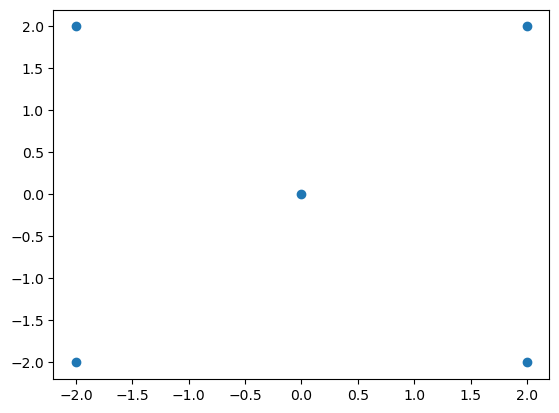

In [38]:
#1 having fixed points  we get the point moving toward them depending on 
# the strength of pulling to the given fixed point

# importing two required module 
import numpy as np
import matplotlib.pyplot as plt
import toolz
import optax
import jax.numpy as jnp
import jax
from flax import linen as nn


def get_contribution_in_axes(fixed_point,strength):
    # print(f"fixed_point {fixed_point} strength {strength}")
    e_x= jnp.array([1.0,0.0])
    e_y= jnp.array([0.0,1.0])
    x=optax.cosine_similarity(e_x,fixed_point)*strength
    y=optax.cosine_similarity(e_y,fixed_point)*strength
    return jnp.array([x,y])
v_get_contribution_in_axes=jax.vmap(get_contribution_in_axes)



points_const= jnp.array([[-2.0,-2.0],[-2.0,2.0],[2.0,2.0],[2.0,-2.0]])
# points_const= jnp.array([[2.0,2.0],[2.0,4.0],[4.0,4.0],[4.0,2.0]])
attraction_strength=jnp.array([1.0,1.0,1.0,1.0])



to_move=v_get_contribution_in_axes(points_const,attraction_strength)


# to_move=list(map(lambda tuple: get_contribution_in_axes(tuple[0],tuple[1]), list(zip(points_const,attraction_strength ) )))
# to_move=jnp.stack(to_move)
calced=jnp.sum(to_move,axis=0)
calced= jnp.expand_dims(calced,axis=0)

points_const= jnp.concatenate([points_const,calced],axis=0)
X,Y=list(toolz.sandbox.core.unzip(points_const))
X=list(X)
Y=list(Y)
plt.scatter(X,Y)
plt.show()


# optax.cosine_distance(jnp.array([[2.0,2.0]]),jnp.array([[2.0,2.0]]))

grid_b_points_x (5, 4, 2) grid_b_points_y (4, 5, 2) grid_c_points (5, 5, 2)


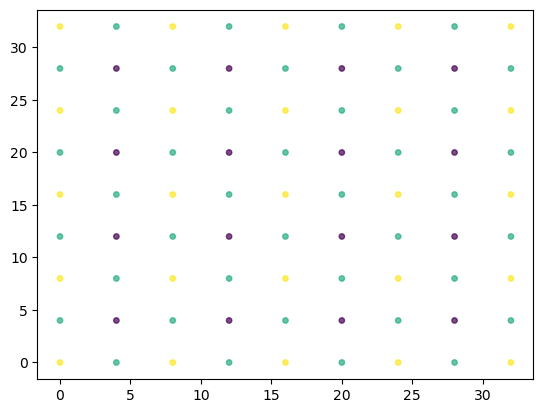

grid_a_points (4, 4, 2) grid_b_points_x (5, 4, 2) grid_b_points_y (4, 5, 2) grid_c_points (5, 5, 2)


In [39]:
import einops
""" 
grid_b - green
grid_a - black
grid_c - yellow
now we need to 
1) given black are sv centers ; green will move only between centers; yellow will be moved using get_contribution_in_axes
    we will give some random floats as weights here and observe how it will look like
2) given some additional points that is not currently in the grid we will want to establish in which sv it is and mark this one in the display
"""

r=8
half_r=r/2
diam_x=32+r
diam_y=32+r
gridd=einops.rearrange(jnp.mgrid[r:diam_x:r, r:diam_y:r],'c x y-> x y c')-half_r
gridd_bigger=einops.rearrange(jnp.mgrid[0:diam_x+r:r,0:diam_y+r:r],'c x y-> x y c')-half_r



# r=1
# half_r=r/2
# gridd=einops.rearrange(jnp.mgrid[0:6, 0:6],'c x y-> x y c')
# gridd_bigger=einops.rearrange(jnp.mgrid[-1:7, -1:7],'c x y-> x y c')





# r=4
# half_r=r/2
# gridd=einops.rearrange(jnp.mgrid[half_r:12-half_r:half_r, half_r:12-half_r:half_r],'c x y-> x y c')
# gridd_bigger=einops.rearrange(jnp.mgrid[0:12:half_r, 0:12:half_r],'c x y-> x y c')

# gridd=einops.rearrange(gridd,'(a e d) c-> d e a c', d=2,e=2)
grid_a_points=gridd
grid_c_points=(gridd_bigger+jnp.array([half_r,half_r]))[0:-1,0:-1,:]
grid_b_points_x= (gridd_bigger+jnp.array([half_r,0.0]))[0:-1,1:-1,:]
grid_b_points_y= (gridd_bigger+jnp.array([0,half_r]))[1:-1,0:-1,:]

## bigger
# gridd_bigger=einops.rearrange(jnp.mgrid[-r:diam_x+2*r:r,-r:diam_y+2*r:r],'c x y-> x y c')-half_r
# grid_a_points=einops.rearrange(jnp.mgrid[0:diam_x+r:r, 0:diam_y+r:r],'c x y-> x y c')-half_r
# grid_b_points_x= (gridd_bigger+jnp.array([half_r,0.0]))[1:-2,1:-1,:]
# grid_b_points_y= (gridd_bigger+jnp.array([0,half_r]))[1:-1,1:-2,:]

# ## cutting
# grid_a_points=grid_a_points[1:-1,1:-1,:]
# grid_b_points_x=grid_b_points_x[:,1:-1,:]
# grid_b_points_y=grid_b_points_y[1:-1,:,:]

print(f"grid_b_points_x {grid_b_points_x.shape} grid_b_points_y {grid_b_points_y.shape} grid_c_points {grid_c_points.shape}")


def disp_grid(grid_a_points,grid_b_points_x,grid_b_points_y,grid_c_points):

    c_a=np.ones_like(grid_a_points[:,:,1])-0.9
    c_b_x=np.ones_like(grid_b_points_x[:,:,1])+0.9
    c_b_y=np.ones_like(grid_b_points_y[:,:,1])+0.9
    c_c=np.ones_like(grid_c_points[:,:,1])+2.0


    s_a=np.ones_like(grid_a_points[:,:,1])
    s_b_x=np.ones_like(grid_b_points_x[:,:,1])
    s_b_y=np.ones_like(grid_b_points_y[:,:,1])
    s_c=np.ones_like(grid_c_points[:,:,1])
    base_x=2
    base_y=2

    # s_a[base_x,base_y]=s_a[0,0]*4
    # s_b_x[base_x,base_y]=s_b_x[0,0]*4
    # s_b_y[base_x,base_y]=s_b_y[0,0]*4
    # s_b_x[base_x+1,base_y]=s_b_x[0,0]*4
    # s_b_y[base_x,base_y+1]=s_b_y[0,0]*4

    # s_c[base_x,base_y]=s_c[0,0]*4
    # s_c[base_x,base_y+1]=s_c[0,0]*4
    # s_c[base_x+1,base_y]=s_c[0,0]*4
    # s_c[base_x+1,base_y+1]=s_c[0,0]*4


    grid_b_points_x=einops.rearrange(grid_b_points_x,'x y c-> (x y) c')
    grid_b_points_y=einops.rearrange(grid_b_points_y,'x y c-> (x y) c')
    grid_c_points=einops.rearrange(grid_c_points,'x y c-> (x y) c')
    grid_a_points=einops.rearrange(grid_a_points,'x y c-> (x y) c')

    grid_b_points= jnp.concatenate([grid_b_points_x,grid_b_points_y])
    x=jnp.concatenate([grid_a_points[:,0],grid_b_points[:,0],grid_c_points[:,0]])
    y=jnp.concatenate([grid_a_points[:,1],grid_b_points[:,1],grid_c_points[:,1]])

    c= jnp.concatenate([c_a.flatten(),c_b_x.flatten(),c_b_y.flatten(),c_c.flatten()])
    s=jnp.concatenate([s_a.flatten(),s_b_x.flatten(),s_b_y.flatten(),s_c.flatten()])*15
    plt.scatter(x,y,s=s,c=c,alpha=0.7)
    plt.show()


disp_grid(grid_a_points,grid_b_points_x,grid_b_points_y,grid_c_points)

print(f"grid_a_points {grid_a_points.shape} grid_b_points_x {grid_b_points_x.shape} grid_b_points_y {grid_b_points_y.shape} grid_c_points {grid_c_points.shape}")

In [40]:
print(f"grid_a_points {grid_a_points} \n grid_b_points_x {grid_b_points_x} \n grid_b_points_y {grid_b_points_y} \n grid_c_points {grid_c_points} \n ")

grid_a_points [[[ 4.  4.]
  [ 4. 12.]
  [ 4. 20.]
  [ 4. 28.]]

 [[12.  4.]
  [12. 12.]
  [12. 20.]
  [12. 28.]]

 [[20.  4.]
  [20. 12.]
  [20. 20.]
  [20. 28.]]

 [[28.  4.]
  [28. 12.]
  [28. 20.]
  [28. 28.]]] 
 grid_b_points_x [[[ 0.  4.]
  [ 0. 12.]
  [ 0. 20.]
  [ 0. 28.]]

 [[ 8.  4.]
  [ 8. 12.]
  [ 8. 20.]
  [ 8. 28.]]

 [[16.  4.]
  [16. 12.]
  [16. 20.]
  [16. 28.]]

 [[24.  4.]
  [24. 12.]
  [24. 20.]
  [24. 28.]]

 [[32.  4.]
  [32. 12.]
  [32. 20.]
  [32. 28.]]] 
 grid_b_points_y [[[ 4.  0.]
  [ 4.  8.]
  [ 4. 16.]
  [ 4. 24.]
  [ 4. 32.]]

 [[12.  0.]
  [12.  8.]
  [12. 16.]
  [12. 24.]
  [12. 32.]]

 [[20.  0.]
  [20.  8.]
  [20. 16.]
  [20. 24.]
  [20. 32.]]

 [[28.  0.]
  [28.  8.]
  [28. 16.]
  [28. 24.]
  [28. 32.]]] 
 grid_c_points [[[ 0.  0.]
  [ 0.  8.]
  [ 0. 16.]
  [ 0. 24.]
  [ 0. 32.]]

 [[ 8.  0.]
  [ 8.  8.]
  [ 8. 16.]
  [ 8. 24.]
  [ 8. 32.]]

 [[16.  0.]
  [16.  8.]
  [16. 16.]
  [16. 24.]
  [16. 32.]]

 [[24.  0.]
  [24.  8.]
  [24. 16.]
  [24. 24.]
  

In [41]:
# grid_b_points_x=einops.rearrange(grid_b_points_x,'x y c-> (x y) c')
# grid_b_points_y=einops.rearrange(grid_b_points_y,'x y c-> (x y) c')
# grid_c_points=einops.rearrange(grid_c_points,'x y c-> (x y) c')
# grid_a_points=einops.rearrange(grid_a_points,'x y c-> (x y) c')

sv_center=grid_a_points[0,0,:]
grid_b_points_x[1,0,:]

Array([8., 4.], dtype=float32)

grid_b_points_x (5, 4, 2) grid_b_points_x_weights [[[0.41526744 0.58473253]
  [0.5499076  0.45009238]
  [0.40630987 0.59369016]
  [0.53159285 0.46840715]]

 [[0.45230076 0.5476992 ]
  [0.34544703 0.65455294]
  [0.6684717  0.3315283 ]
  [0.52950096 0.47049904]]

 [[0.4517585  0.5482415 ]
  [0.3431205  0.65687954]
  [0.5533112  0.44668877]
  [0.46080136 0.53919864]]

 [[0.33558604 0.6644139 ]
  [0.54108727 0.45891273]
  [0.4735473  0.52645266]
  [0.45628285 0.54371715]]

 [[0.4856289  0.5143711 ]
  [0.40345997 0.59654003]
  [0.45590994 0.54409003]
  [0.35196546 0.6480346 ]]] 


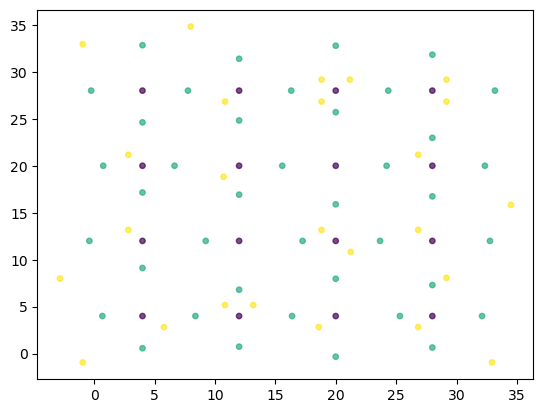

In [42]:
""" 
grid_a_points represent grid centers - we need also to have weights that are associated with sv and that will be used to controll sv geometry
entry 0 and 1 - for strenth up and down x axis
2 and 3 = for strenth up and down y axis
4- up_x,up_y
5- up_x,down_y
6- down_x,up_y
7- down_x,down_y
"""
# weights=np.ones((grid_a_points.shape[0],grid_a_points.shape[1],8))*2
weights=(np.random.random((grid_a_points.shape[0],grid_a_points.shape[1],8))-0.5)*2
# weights=np.ones_like(weights)#*110000000.0
# weights[2,2,:]=-10000.0


def get_4_point_loc(points_const,point_weights,half_r):
    half_r_bigger=half_r#*1.2
    calced=v_get_contribution_in_axes(points_const,point_weights)

    
    calced=jnp.sum(calced,axis=0)
    # calced=calced/(jnp.max(calced.flatten())+0.00001)
    return calced*half_r_bigger

def divide_my(el):
    # print(f"aaaaaaaaaaaaa {el}")
    res=el[0]/jnp.sum(el)
    return jnp.array([res,1-res])
v_divide_my= jax.vmap( divide_my,in_axes=0)
v_v_divide_my= jax.vmap( v_divide_my,in_axes=0)

def get_b_x_weights(weights):
    weights_curr=weights[:,:,0:2] 
    grid_b_points_x_weights_0=np.pad(weights_curr[:,:,0],((1,0),(0,0)))
    grid_b_points_x_weights_1=np.pad(weights_curr[:,:,1],((0,1),(0,0)))
    grid_b_points_x_weights= np.stack([grid_b_points_x_weights_0,grid_b_points_x_weights_1],axis=-1)
    grid_b_points_x_weights=nn.sigmoid(grid_b_points_x_weights)
    return v_v_divide_my(grid_b_points_x_weights)


def get_b_y_weights(weights):
    weights_curr=weights[:,:,2:4] 
    grid_b_points_y_weights_0=np.pad(weights_curr[:,:,0],((0,0),(1,0)))
    grid_b_points_y_weights_1=np.pad(weights_curr[:,:,1],((0,0),(0,1)))
    grid_b_points_y_weights= np.stack([grid_b_points_y_weights_0,grid_b_points_y_weights_1],axis=-1)
    grid_b_points_y_weights=nn.sigmoid(grid_b_points_y_weights)
    return v_v_divide_my(grid_b_points_y_weights)
# return nn.softmax(grid_b_points_y_weights*100,axis=-1)


grid_b_points_x_weights=get_b_x_weights(weights)
grid_b_points_y_weights=get_b_y_weights(weights)


def get_for_four_weights(weights):
    """ 
        4- up_x,up_y
        5- up_x,down_y
        6- down_x,up_y
        7- down_x,down_y
    """
    up_x_up_y=np.pad(weights[:,:,4],((1,0),(1,0)))
    up_x_down_y=np.pad(weights[:,:,5],((1,0),(0,1)))
    down_x_up_y=np.pad(weights[:,:,6],((0,1),(1,0)))
    down_x_down_y=np.pad(weights[:,:,7],((0,1),(0,1)))

    grid_c_points_weights=np.stack([up_x_up_y,up_x_down_y,down_x_up_y,down_x_down_y],axis=-1)
    # print(f"grid_c_points_weights in get_for_four_weights {grid_c_points_weights} \n \n ")

    # print(f"grid_c_points {grid_c_points.shape} grid_c_points_weights {grid_c_points_weights.shape}")
    # return nn.tanh(grid_c_points_weights*100) 
    return nn.softmax(grid_c_points_weights*100,axis=-1) 

def apply_for_four_weights(grid_c_points_weight,grid_c_point,half_r):
    points_const=jnp.stack([  jnp.array([-half_r,-half_r])
                              ,jnp.array([-half_r,half_r])
                              ,jnp.array([half_r,-half_r])
                              ,jnp.array([half_r,half_r])
                              ],axis=0)

    calced=get_4_point_loc(points_const,grid_c_points_weight,half_r)

    return calced+grid_c_point
v_apply_for_four_weights=jax.vmap(apply_for_four_weights,in_axes=(0,0,None))
v_v_apply_for_four_weights=jax.vmap(v_apply_for_four_weights,in_axes=(0,0,None))


def move_in_axis(point,weights,axis,half_r ):
    """ 
    point can move up or down axis no more than half_r from current position 
    weights indicate how strongly it shoul go down (element 0) and up the axis  
    """
    return point.at[axis].set(point[axis]-weights[0]*half_r + weights[1]*half_r)
v_move_in_axis= jax.vmap(move_in_axis,in_axes=(0,0,None,None))
v_v_move_in_axis= jax.vmap(v_move_in_axis,in_axes=(0,0,None,None))

print(f"grid_b_points_x {grid_b_points_x.shape} grid_b_points_x_weights {grid_b_points_x_weights} ")

grid_b_points_x=v_v_move_in_axis(grid_b_points_x,grid_b_points_x_weights,0, half_r)
grid_b_points_y=v_v_move_in_axis(grid_b_points_y,grid_b_points_y_weights,1, half_r)

grid_c_points_weights=get_for_four_weights(weights)
grid_c_points=v_v_apply_for_four_weights(grid_c_points_weights,grid_c_points,half_r)



disp_grid(grid_a_points,grid_b_points_x,grid_b_points_y,grid_c_points)


In [43]:
points_const=jnp.stack([  jnp.array([-half_r,-half_r])
                            ,jnp.array([-half_r,half_r])
                            ,jnp.array([half_r,-half_r])
                            ,jnp.array([half_r,half_r])
                            ],axis=0)
print(f"points_const {points_const} \n \n")

weightss=get_for_four_weights(jnp.array( [[[100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0]]]))
print(f"weightss {weightss} \n \n")

def get_4_point_loc_a(points_const,point_weights,half_r):
    calced=get_contribution_in_axes(points_const,point_weights)
    print(f"calced contribution in axes {jnp.round(calced,2)} \n \n ")
    calced=jnp.sum(calced,axis=-1)
    calced= calced/jnp.sum(calced.flatten())*half_r
    return calced
aa=get_4_point_loc_a(points_const,weightss[0,0,:],half_r)
aa


points_const [[-4. -4.]
 [-4.  4.]
 [ 4. -4.]
 [ 4.  4.]] 
 



weightss [[[0. 0. 0. 1.]
  [0. 0. 1. 0.]]

 [[0. 1. 0. 0.]
  [1. 0. 0. 0.]]] 
 

calced contribution in axes [[-0.   -0.    0.    0.71]
 [-0.    0.   -0.    0.71]] 
 
 


Array([2., 2.], dtype=float32)

In [44]:
nn.softmax(jnp.array([1.0,0.0,0.0,0.0]))

Array([0.47536692, 0.17487772, 0.17487772, 0.17487772], dtype=float32)

In [45]:
# grid_b_points_x_weights=einops.rearrange(grid_b_points_x_weights,'x y c-> (x y) c')
# print(f"grid_b_points_x_weights {grid_b_points_x_weights.shape}")

# def apply_weights_per_sv(grid_a_points,grid_b_points_x,grid_b_points_y,grid_c_points,half_r):
#     #get grid_b_points_x modifications
#     w_b_x_0=jnp.concatenate( )


# grid_a - black
# grid_b - green
# grid_c - yellow

    # s_a[1,1]=s_a[0,0]*4
    # s_b_x[1,1]=s_b_x[0,0]*4
    # s_b_x[2,1]=s_b_x[0,0]*4

    # s_b_y[1,1]=s_b_y[0,0]*4
    # s_b_y[1,2]=s_b_y[0,0]*4

    # s_c[1,1]=s_c[0,0]*4
    # s_c[1,2]=s_c[0,0]*4
    # s_c[2,1]=s_c[0,0]*4
    # s_c[2,2]=s_c[0,0]*4




# grid_b_points_x_weights= np.random.random(grid_b_points_x.shape)
# grid_b_points_y_weights= np.random.random(grid_b_points_y.shape)
# grid_c_points_weights= np.random.random(grid_c_points.shape[0],4)

# def get_simple_4_point():
    


def differentiable_abs(x):
    """ 
    differentiable approximation of absolute value function
    """
    a=4.0
    return x*np.tanh(a*x)



In [46]:


def get_triangle_area(p_0,p_1,p_2):
    area = 0.5 * (p_0[0] * (p_1[1] - p_2[1]) + p_1[0] * (p_2[1] - p_0[1]) + p_2[0]
                  * (p_0[1] - p_1[1]))
    return differentiable_abs(area)
    # return area


# def triangleArea(Point p1, Point p2, Point p3) :         //find area of triangle formed by p1, p2 and p3
#    return abs((p1.x*(p2.y-p3.y) + p2.x*(p3.y-p1.y)+ p3.x*(p1.yp2.y))/2.0);



# Area =
# 1
# 2
# [x1(y2 - y3) + x2(y3 - y1) + x3(y1 - y2)]


def is_point_in_triangle(test_point,sv_center,control_point_a,control_point_b):
    """ 
    basic idea is that if a point is inside the triangle and we will create 3 sub triangles inside 
    where the new point is the apex and the bases are the 3 edges of the tested triangles
    if the sum of the areas of the sub triangles is equal the area of tested triangle the point is most probably inside the tested triangle
    if the sum of the subtriangles areas is diffrent then area of tested triangle it is for sure not in the triangle
    tested triangle will be always build from 3 points where sv center is one of them and other 2 points are sv control points
    adapted from https://stackoverflow.com/questions/59597399/area-of-triangle-using-3-sets-of-coordinates
    added power and sigmoid to the end to make sure that if point is in the triangle it will be approximately 0 and otherwise approximately 1
    """
    main_triangle_area= get_triangle_area(sv_center,control_point_a,control_point_b)
    sub_a=get_triangle_area(test_point,control_point_a,control_point_b)
    sub_b=get_triangle_area(sv_center,test_point,control_point_b)
    sub_c=get_triangle_area(sv_center,control_point_a,test_point)

    subtriangles_area= sub_a+sub_b+sub_c
    area_diff=main_triangle_area-subtriangles_area
    area_diff=jnp.power(area_diff,2)
    return (nn.sigmoid(area_diff*5000)-0.5)*2

pointtt= (np.sqrt(32)/2)+0.1
print(f"pointtt {pointtt}")
test_point=[pointtt,pointtt]
sv_center=[1,1]
control_point_a=[1,5]
control_point_b=[5,1]


# krowa we know order of points by construction (at least i suppose) does it let us deal with tanh
# krowa alternative is that we could get the sum of the angles next to the query point sum of those as far as i think should be always 360 degrees

valll=is_point_in_triangle(test_point,sv_center,control_point_b,control_point_a)
valll


pointtt 2.9284271247461904


Array(0.9999981, dtype=float32)

In [47]:
np.sum(np.array([1,-2,4])/3)

1.0

In [48]:
pointtt= np.sqrt(32)/2
test_point=jnp.array([pointtt,pointtt]).astype(float)
sv_center=jnp.array([1,1]).astype(float)
control_point_a=jnp.array([1,5]).astype(float)
control_point_b=jnp.array([5,1]).astype(float)

def get_projection_diff(a,b,epsilon):
    """ 
    if will return negative number it is outside of the triangle in given direction
    I added tanh to keep it always between -1 and 1
    """
    return ((jnp.dot(a, b) / (jnp.dot(b, b) + epsilon)) * b)- jnp.sqrt(jnp.dot(b,b))
    # return ((jnp.dot(a, b) / jnp.dot(b, b)) * b)-jax.numpy.linalg.norm(b, ord=2)
    # return jnp.dot(a, b)/jax.numpy.linalg.norm(a, ord=2)
# on_a=jnp.dot(control_point_a-sv_center,test_point-sv_center)
# on_b=jnp.dot(control_point_b-sv_center,test_point-sv_center)
# on_a=get_projection(test_point-sv_center,control_point_a-sv_center)
# on_b=get_projection(test_point-sv_center,control_point_b-sv_center)
epsilon=0.00000000000001
on_a=get_projection_diff(control_point_a-sv_center,test_point-sv_center,epsilon)
on_b=get_projection_diff(control_point_b-sv_center,test_point-sv_center,epsilon)
print(f"on_a {on_a} on_b {on_b}")

on_a [-0.58578646 -0.58578646] on_b [-0.58578646 -0.58578646]


In [49]:
x = [1, 1, 5]
y = [1, 5, 1]


def get_area(x, y):
    area = 0.5 * (x[0] * (y[1] - y[2]) + x[1] * (y[2] - y[0]) + x[2]
                  * (y[0] - y[1]))
    return int(area)


coords = zip(x, y)
print('Area of points {}, {}, {} is {}'.format(*coords, get_area(x, y)))

Area of points (1, 1), (1, 5), (5, 1) is -8


In [50]:
from jax.scipy import ndimage as jndimage

aa= jnp.ones((5,5))
aa=aa.at[2,2].set(3)
# grid_x, grid_y = np.meshgrid(np.arange(aa.shape[1]), np.arange(aa.shape[0]))
# # jax.scipy.ndimage.map_coordinates(aa,jnp.array([1,1]),order=3)
# coords=jnp.stack([grid_x, grid_y])
# print(f" coords prim {coords.shape} ")
coords=jnp.array([[2.8,2.8],[2.1,2.1]])
coords=einops.rearrange(coords,'a c -> c a 1')
jndimage.map_coordinates(aa, coords, order=1)
# coords.shape

Array([[1.08     ],
       [2.6200004]], dtype=float32)

In [51]:
def analyze_single_sv(sv_center_coord, back_x,front_x,back_y,front_y,up_x_up_y,up_x_down_y,down_x_up_y,down_x_down_y,half_r):
    """ 
    gets a sv and the positions of its control points to establish which points in a set 
    pixel grid are in the currently analyzed sv
    as we are working per area we need also to take into account added padding in order to 
    adjust coordinates
    """


    

    # s_a[1,1]=s_a[0,0]*4
    # s_b_x[1,1]=s_b_x[0,0]*4
    # s_b_y[1,1]=s_b_y[0,0]*4
    # s_b_x[2,1]=s_b_x[0,0]*4
    # s_b_y[1,2]=s_b_y[0,0]*4

    # s_c[1,1]=s_c[0,0]*4
    # s_c[1,2]=s_c[0,0]*4
    # s_c[2,1]=s_c[0,0]*4
    # s_c[2,2]=s_c[0,0]*4


# is_point_in_triangle(test_point,sv_center,control_point_a,control_point_b)
grid_a_points.shape

(4, 4, 2)

In [52]:
beg=0.0
end=10.0
control = 4.0
p_test=3.0
nn.sigmoid( (control-p_test)*100 )

Array(1., dtype=float32, weak_type=True)

In [53]:
""" 
we will analize the squares where svs are their corners 
in the borders of those squares the point ownership will be decided based just on "green points" so only 2 svs will fight for ownership
i all of the rst all 4 svs - that are constituting the corners will compete for point ownership and all triangles in this square needs to be taken into account
we have unfortunately special cases on the borders where we do not have svs in some directions we will deal with the issue by padding it so we will just add padding

additionally when analyzing triangles we would have 4 diffrent possible ids of the corner svs - let's call them alpha beta delta and gamma 
so in alpha upper left corner will have id 0 upper left id 1 upper right id 2 lower right id 3 lower left ... and beta delta and gamma will have accordingly to keep the ids consistent
"""
def get_triangles_data():
    """ 
    manually setting data about what triangles are present in each square 
    it is based on set of sv centers and control points - also comments are to the upper left square of the image in 
    /workspaces/jax_cpu_experiments_b/geometric_sv_idea/triangle_geometric_sv.jpg
    we will also use the id of nodes as in the image bottom right
    single triangle data will consist of 4 entries - first 3 will be verticies ids as in image and the last one the id of the sv that is owner of this node
        as in the alpha order 
    """
    return jnp.array(
         [[0,8,1,0]#A
         ,[0.1,2,0]#B
         ,[0,2,3,1]#C
         ,[0,3,4,1]#D
         ,[0,4,5,2]#L
         ,[0,5,6,2]#K
         ,[0,6,7,3]#J
         ,[0,7,8,3]]#I
        )

def analyze_single_triangle(curried,triangle_dat):
    """ 
    given a point it is designed to be scanned over triangles
    """
    x_y,control_points_coords,res=curried
    is_in=is_point_in_triangle(x_y,control_points_coords[triangle_dat[0],:],control_points_coords[triangle_dat[1],:],control_points_coords[triangle_dat[3],:])
    return (x_y,control_points_coords,res.at[triangle_dat[3]].set(res[triangle_dat[3]]+is_in ))


def analyze_single_point(x_y,triangles_data,control_points_coords):
    """ 
    analyze thepoints of sv area (apart from edges) by checking it against the triangles
    we will scan over those triangles and return array of length 4 that will indicate to which sv given point is attached
    x_y - array with 2 entries indicating x and y coordinates of currently analyzed point
    triangles_data - constants describing points and to which sv they belong
    control_points_coords - coordinates of the sv centers and control points in order as indicated at image 
        /workspaces/jax_cpu_experiments_b/geometric_sv_idea/triangle_geometric_sv.jpg
    """
    curried=x_y,control_points_coords,jnp.zeros(4)
    res,_= jax.lax.scan(analyze_single_triangle,curried, triangles_data)
    return res[2]

v_analyze_single_point=jax.vmap(analyze_single_point,in_axes=(0,None,None))
v_v_analyze_single_point=jax.vmap(v_analyze_single_point,in_axes=(0,None,None))

def analyze_point_linear(curr_point, control_point,channel_up,channel_down):
    """ 
    as we are analyzing bottom and right border as lines we are just intrested weather given point is up or 
        down the axis from control point
    curr_point - float representing the position in axis of intrest of the point currently analyzed
    control_point - float representing the position in axis of intrest of the point currently analyzed
    channel_up - the channel owned by the sv up the axis
    channel_down - the channel owned by the sv down the axis
    """
    #will give close to 1 if test point is maller than control
    is_test_smaller_than_control=nn.sigmoid( (control_point-curr_point)*100 )
    res=jnp.zeros(4)
    res=res.at[channel_up].set(1-is_test_smaller_than_control)
    res=res.at[channel_down].set(is_test_smaller_than_control)
    return res

v_analyze_point_linear= jax.vmap(analyze_point_linear,in_axes=(0,None,None,None))

def reshuffle_channels(res,sv_area_type):
    """ 
    sv_area_type - we have 4 sv_area_type in first node 0 is in upper left corner and we go clockwise so bottom left is 3
        other sv types are set in a way to be consistent with first sv_area_type
    we get res as the input that has the channels organised as if it is first type this funtion is to fix it
    """
    print(f"rrrres should have 3 dim {res.shape}")
    def alfa():
        return res
        
    def beta():
        #0 1 2 3 -> 1 0 3 2
        return res[:,:, jnp.array([1,0,3,2])]
        
    def delta():
        #0 1 2 3 -> 3 2 1 0
        return res[:,:, jnp.array([3,2,1,0])]

    def gamma():
        #0 1 2 3 -> 2 3 0 1
        return res[:,:, jnp.array([2,3,0,1])]

    functions_list=[alfa,beta,delta,gamma]
    return jax.lax.switch(sv_area_type,functions_list)    


def analyze_square(control_points_coords,diameter
                   ,triangles_data,sv_area_type):
    """ 
    analyzing single square where each corner is created by sv center
    triangles_data- constants describing triangles specified in get_triangles_data function
    diameter - diameter of sv area - what is important the right and bottom edges will be treated separately as their ownership calculations do not require triangle analysis
    control_points_coords - data about location of control points where entries are organized as in the main image
    sv_area_type - we have 4 sv_area_type in first node 0 is in upper left corner and we go clockwise so bottom left is 3
        other sv types are set in a way to be consistent with first sv_area_type
    """
    #get grid of points and apply analyze_single_point ignoring left and bottom borders for now
    grid=einops.rearrange(jnp.mgrid[0:diameter, 0:diameter],'c x y-> x y c')
    grid_right= grid[-1,:,:]
    grid_bottom= grid[:,-1,:]
    grid=grid[0:-1,0:-1,:]
    res=v_v_analyze_single_point(grid,triangles_data,control_points_coords)
    #analyze bottom and right border we assume that we are in square alpha so right border is between sv 1vs2 and bottom 2 vs 3
    right=v_analyze_point_linear(grid_right,control_points_coords[4],1,2)
    bottom=v_analyze_point_linear(grid_bottom,control_points_coords[6],2,3)
    #recreate full grid
    res= jnp.pad(res,((0,1),(0,1),(0,0)))
    res=res.at[-1,:,:]=right
    res=res.at[:,-1,:]=bottom
    #reshuffle the order of channels so they id of svs will be consistent between areas
    res=reshuffle_channels(res,sv_area_type)
    #return 4 channel array where each channel tell about given sv and weather this point is owned but that sv
    return res

v_analyze_square=jax.vmap(analyze_square,in_axes=(0,None,None,None) )
v_v_analyze_square=jax.vmap(v_analyze_square,in_axes=(0,None,None,0) )
v_v_v_analyze_square=jax.vmap(v_v_analyze_square,in_axes=(0,None,None,0) )

def analyze_all_control_points(grid_a_points,grid_b_points_x,grid_b_points_y,grid_c_points,pmapped_batch_size,sv_diameter):
    #pad the grid control points so we can divide it basically we need to enlarge grid_a_points, grid_b_points_x and grid_b_points_y
    gridd_bigger=einops.rearrange(jnp.mgrid[-r:diam_x+2*r:r,-r:diam_y+2*r:r],'c x y-> x y c')-half_r
    grid_a_points_big=einops.rearrange(jnp.mgrid[0:diam_x+r:r, 0:diam_y+r:r],'c x y-> x y c')-half_r
    grid_b_points_x_big= (gridd_bigger+jnp.array([half_r,0.0]))[1:-2,1:-1,:]
    grid_b_points_y_big= (gridd_bigger+jnp.array([0,half_r]))[1:-1,1:-2,:]
    #set up for batch size
    grid_a_points_big=einops.repeat(grid_a_points_big, 'x y c->b x y c', b=pmapped_batch_size) 
    grid_b_points_x_big=einops.repeat(grid_b_points_x_big, 'x y c->b x y c', b=pmapped_batch_size) 
    grid_b_points_y_big=einops.repeat(grid_b_points_y_big, 'x y c->b x y c', b=pmapped_batch_size) 
    #resetting learned control point positions
    grid_a_points_big=grid_a_points_big.at[1:-1,1:-1,:].set(grid_a_points)
    grid_b_points_x_big=grid_b_points_x_big.at[:,1:-1,:].set(grid_b_points_x)
    grid_b_points_y_big=grid_b_points_y_big.at[1:-1,1:-1,:].set(grid_b_points_y)
    # #reshape control points so they can be used in vmap 
    # grid_b_points_x_big=einops.rearrange(grid_b_points_x_big,'x y c-> (x y) c')
    # grid_b_points_y_big=einops.rearrange(grid_b_points_y_big,'x y c-> (x y) c')
    # grid_c_points=einops.rearrange(grid_c_points,'x y c-> (x y) c')
    # grid_a_points_big=einops.rearrange(grid_a_points_big,'x y c-> (x y) c')
    #join control points and sv centers in control_points_coords in the order as indicated in image /workspaces/jax_cpu_experiments_b/geometric_sv_idea/triangle_geometric_sv.jpg
    control_points_coords=[
        grid_c_points#0
        ,grid_a_points_big[:,0:-1,0:-1,:]#1
        ,grid_b_points_x_big[:,:,0:-1,:]#2
        ,grid_a_points_big[:,1:,0:-1,:]#3
        ,grid_b_points_y_big[:,1:,:,:]#4
        ,grid_a_points_big[:,1:,1:,:]#5
        ,grid_b_points_x_big[:,:,1:,:]#6
        ,grid_a_points_big[:,0:-1,1:,:]#7
        ,grid_b_points_y_big[:,0:-1,:,:]#8
    ]
    control_points_coords=einops.rearrange(control_points_coords,'st b x y c ->b x y st c')
    #we prepare data for vmapping - sv area type has this checkerboard organization
    triangles_data=get_triangles_data()
    shh= grid_c_points.shape
    sv_area_type=jnp.zeros((shh[1],shh[2]))
    sv_area_type.at[1::2,0::2].set(3)
    sv_area_type.at[1::2,1::2].set(2)
    sv_area_type.at[0::2,1::2].set(1)
    #vmap over analyze_square    
    res=v_v_v_analyze_square(control_points_coords,sv_diameter,triangles_data,sv_area_type)

    #select part that we are intrested in and subtract pad value from coordinates basically reverse padding 
    ## cutting
    res=res[:,1:-1,1:-1,:]

    
    #returns the 4 channel mask that encode the ownership of the pixels for each supervoxel
    return res

sv_diameter=r
pmapped_batch_size=1
grid_a_points=einops.repeat(grid_a_points, 'x y c->b x y c', b=pmapped_batch_size) 
grid_b_points_x=einops.repeat(grid_b_points_x, 'x y c->b x y c', b=pmapped_batch_size) 
grid_b_points_y=einops.repeat(grid_b_points_y, 'x y c->b x y c', b=pmapped_batch_size) 
grid_c_points=einops.repeat(grid_c_points, 'x y c->b x y c', b=pmapped_batch_size) 

analyze_all_control_points(grid_a_points,grid_b_points_x,grid_b_points_y,grid_c_points,pmapped_batch_size,sv_diameter)



ValueError: Incompatible shapes for broadcasting: (1, 5, 4, 2) and requested shape (1, 3, 6, 2)

In [ ]:
a=np.zeros((8,8))
a[1::2,0::2]=3
a[1::2,1::2]=2
a[0::2,1::2]=1
a

In [ ]:
import einops
import jax.numpy as jnp
import numpy as np
grr=einops.rearrange(np.mgrid[0:4, 0:4],'c x y-> x y c')
grr[:,:,0]=grr[:,:,0]*10
np.sum(grr,axis=-1)

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33]])

In [ ]:
def differentiable_abs(x):
    """ 
    differentiable approximation of absolute value function
    """
    a=4.0
    return x*jnp.tanh(a*x)


def get_triangle_area(p_0,p_1,p_2):
    area = 0.5 * (p_0[0] * (p_1[1] - p_2[1]) + p_1[0] * (p_2[1] - p_0[1]) + p_2[0]
                  * (p_0[1] - p_1[1]))
    return differentiable_abs(area)

def is_point_in_triangle(test_point,sv_center,control_point_a,control_point_b):
    """ 
    basic idea is that if a point is inside the triangle and we will create 3 sub triangles inside 
    where the new point is the apex and the bases are the 3 edges of the tested triangles
    if the sum of the areas of the sub triangles is equal the area of tested triangle the point is most probably inside the tested triangle
    if the sum of the subtriangles areas is diffrent then area of tested triangle it is for sure not in the triangle
    tested triangle will be always build from 3 points where sv center is one of them and other 2 points are sv control points
    adapted from https://stackoverflow.com/questions/59597399/area-of-triangle-using-3-sets-of-coordinates
    added power and sigmoid to the end to make sure that if point is in the triangle it will be approximately 0 and otherwise approximately 1
    """
    main_triangle_area= get_triangle_area(sv_center,control_point_a,control_point_b)
    sub_a=get_triangle_area(test_point,control_point_a,control_point_b)
    sub_b=get_triangle_area(sv_center,test_point,control_point_b)
    sub_c=get_triangle_area(sv_center,control_point_a,test_point)

    subtriangles_area= sub_a+sub_b+sub_c
    area_diff=main_triangle_area-subtriangles_area
    area_diff=jnp.power(area_diff,2)
    print(f"area_diffff {area_diff}")
    return 1-(nn.sigmoid(area_diff*5000)-0.5)*2

x_y=jnp.array([13.0,13.0])
p1= jnp.array([16.0, 16.0]) 
p2= jnp.array([16.0, 12.0])
p3=jnp.array([20.0, 16.0])

is_point_in_triangle(x_y,p1,p2,p3)

area_diffff 144.0


Array(1., dtype=float32)

In [ ]:
import itertools
from itertools import permutations
from itertools import product
import jax.numpy as jnp
# p = permutations([0,1,2,3])
# p=list(p)
# res=list(product(p,p,p))
aa=['a','b','c']
cart_prod=list(product(aa,aa))
cart_prod= list(filter(lambda tupl: tupl[0]!=tupl[1],cart_prod))
cart_prod

[('a', 'b'), ('a', 'c'), ('b', 'a'), ('b', 'c'), ('c', 'a'), ('c', 'b')]

In [ ]:
res[1543]

((0, 2, 1, 3), (2, 3, 0, 1), (1, 0, 3, 2))

In [ ]:
res[1405]

((0, 2, 1, 3), (1, 3, 0, 2), (2, 0, 3, 1))

In [ ]:
import numpy as np

aa = np.array([[1,2,3,4],[0,1,2,3]])
aa[:,np.array([3,2,1,0])]

array([[4, 3, 2, 1],
       [3, 2, 1, 0]])

In [ ]:
#mask bottom right
a=9106
b=6871
c=5650
# d=7447
print(f"{res[a]}\n{res[b]}\n{res[c]}")

# finished at 9665

((2, 1, 3, 0), (3, 0, 2, 1), (1, 3, 0, 2))
((1, 3, 2, 0), (3, 2, 0, 1), (1, 0, 3, 2))
((1, 2, 3, 0), (3, 0, 2, 1), (1, 3, 0, 2))


In [ ]:
#mask bottom left
a=7447
b=2509
print(f"{res[a]}\n{res[b]}")


((2, 0, 1, 3), (3, 2, 0, 1), (1, 0, 3, 2))
((0, 3, 1, 2), (1, 2, 0, 3), (2, 0, 3, 1))


In [ ]:
#mask top right
a=4717
b=5293
c=2143
print(f"{res[a]}\n{res[b]}\n{res[c]}")


((1, 2, 0, 3), (0, 3, 1, 2), (2, 0, 3, 1))
((1, 2, 3, 0), (0, 3, 1, 2), (2, 0, 3, 1))
((0, 2, 3, 1), (2, 3, 1, 0), (1, 0, 3, 2))


In [ ]:
a=0
b=2

print(f"{a/(a+b)} {(a+0.00000000001)/(a+b+0.000000000000001)}")

0.0 4.999999999999997e-12


In [ ]:
""" 
Find point where altitude meets base (Python)
based on https://stackoverflow.com/questions/55230528/find-point-where-altitude-meets-base-python
Needed point is orthogonal projection of vertex point (say vertex C) onto the line containing opposite side
"""

In [ ]:
""" 
alternatively we can add more control points by constraining the possible positions of current yellows to the given anlges relative to sv centers ...


in order to add control points between current control points (for the example we will want to add control point C between current control points A and B) we have to 
be sure that the the newly created point will be accessible from all of the sv centers that will compete for this point - by accessible I mean that we can get a straight line
    from each sv center and all parametrirized positions of the new point that will not cross any other sv edges


"""